In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("/Users/mdnaif/Desktop/Winter_Arc_ML/Day04_Random_Forest/heart_cleveland_upload.csv")

In [41]:
print("Size : ",df.size)
print("Shape : ",df.shape)

Size :  4158
Shape :  (297, 14)


In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [43]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


### EDA

In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [47]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

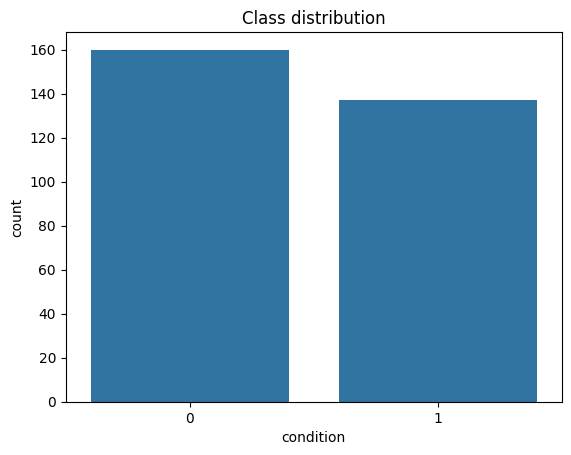

In [50]:
sns.countplot(x= df["condition"],data = df)
plt.title("Class distribution")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

cat_coln = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]
num_coln =["age","trestbps","chol","thalach","oldpeak"]

X = df[cat_coln + num_coln]
y = df["condition"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

preprocessing = ColumnTransformer([
    ("cat_col",OneHotEncoder(handle_unknown="ignore"),cat_coln),
    ("num_col","passthrough",num_coln)
])

pipeline = make_pipeline(
    (preprocessing),
    (RandomForestClassifier(random_state=42, oob_score=True))
)

In [53]:
pipeline.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat_col',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                   'slope', 'ca', 'thal']),
                                 ('num_col', 'passthrough',
                                  ['age', 'trestbps', 'chol', 'thalach',
                                   'oldpeak'])]),
 'randomforestclassifier': RandomForestClassifier(oob_score=True, random_state=42)}

In [54]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "randomforestclassifier__n_estimators": [100, 150, 200],
    "randomforestclassifier__max_depth": [3, 4, 5, 6, 7, None],
    "randomforestclassifier__max_features": ["sqrt", "log2"],
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],
    "randomforestclassifier__bootstrap": [True],  # keep True
    "randomforestclassifier__max_samples": [0.7, 0.8, None],
    "randomforestclassifier__criterion": ["gini", "entropy"]
}

grid = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train,y_train)

best_model = grid.best_estimator_
print(grid.best_params_)

{'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_samples': 0.7, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__bootstrap': True}


In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = best_model.predict(X_test)

print(f"Acccuracy : \n{accuracy_score(y_test,y_pred)}\n")
print(f"Confusion_matrix : \n{confusion_matrix(y_test,y_pred)}\n")
print(f"Classification_report : \n{classification_report(y_test,y_pred)}\n")

Acccuracy : 
0.8666666666666667

Confusion_matrix : 
[[32  0]
 [ 8 20]]

Classification_report : 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        32
           1       1.00      0.71      0.83        28

    accuracy                           0.87        60
   macro avg       0.90      0.86      0.86        60
weighted avg       0.89      0.87      0.86        60




### Feature Importance

In [56]:
tree = best_model.named_steps["randomforestclassifier"]

feature_names = (
    best_model.named_steps["columntransformer"].get_feature_names_out()
)

importance = tree.feature_importances_

feat_imp = pd.DataFrame({
    "Feature" : feature_names,
    "Importance" : importance
}).sort_values(by="Importance",ascending=False)

print(feat_imp.head(10))

             Feature  Importance
26  num_col__thalach    0.136319
5      cat_col__cp_3    0.110536
27  num_col__oldpeak    0.108891
16     cat_col__ca_0    0.096291
20   cat_col__thal_0    0.083420
22   cat_col__thal_2    0.068442
23      num_col__age    0.062071
12  cat_col__exang_1    0.046379
25     num_col__chol    0.040275
11  cat_col__exang_0    0.039517


### Saving the Model

In [57]:
import pickle

with open("heart_disease_model_randomforrest.pkl","wb") as f:
    pickle.dump(best_model,f)
    print("Model saved to heart_disease_model_randomforrest.pkl")

Model saved to heart_disease_model_randomforrest.pkl
